In [244]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

In [245]:
users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1",parse_dates = ['creation_time'])
users.invited_by_user_id.isnull().sum()

users.invited_by_user_id = users.invited_by_user_id.fillna(0)
users.invited_by_user_id = users.invited_by_user_id.astype(int)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(3)
memory usage: 890.8+ KB


In [246]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240


In [247]:
engage = pd.read_csv('takehome_user_engagement.csv', parse_dates = ['time_stamp'])
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# 1. Adopted Users

In [248]:
def get_rolling_count(grp, freq):
    return grp.rolling(freq, on='time_stamp')['user_id'].count()

engage['visits_7_days'] = engage.groupby('user_id', as_index=False, group_keys=False).apply(get_rolling_count, '7D')

engage.head(10)

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0
5,2013-12-31 03:45:04,2,1,2.0
6,2014-01-08 03:45:04,2,1,1.0
7,2014-02-03 03:45:04,2,1,1.0
8,2014-02-08 03:45:04,2,1,2.0
9,2014-02-09 03:45:04,2,1,3.0


In [249]:
adopted = engage[engage.visits_7_days >= 3]
len(adopted)

adopted = adopted.drop_duplicates('user_id', keep = 'first')
adopted_ids = adopted.user_id.tolist()

In [250]:
users['adopted'] = users.object_id.isin(adopted_ids)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False


In [251]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null int32
adopted                       12000 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(4), object(3)
memory usage: 902.5+ KB


# 2. Column for organizations size

In [252]:
orgs = users.org_id.value_counts()
orgs.head()

0    319
1    233
2    201
3    168
4    159
Name: org_id, dtype: int64

In [253]:
o = pd.DataFrame(orgs).reset_index()
o.columns = ['org_id', 'user_count']
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
org_id        417 non-null int64
user_count    417 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [254]:
def org_size(ct):
    rtn = 'XS'
    if ct > 200:
        rtn = 'XL'
    elif ct > 149:
        rtn = 'L'
    elif ct > 99:
        rtn = 'M'
    elif ct > 49:
        rtn = 'S'

    return rtn

o['org_size'] = o.user_count.apply(org_size)

o.head()

,org_id,user_count,org_size
0,0,319,XL
1,1,233,XL
2,2,201,XL
3,3,168,L
4,4,159,L


In [255]:
org_size_dict = dict(zip(o.org_id, o.org_size))
users['org_size'] = users.org_id.map(org_size_dict)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,S
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,XL
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,XS
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,XL
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,XS


# 3. Invited by User

In [256]:
invites = users.invited_by_user_id.value_counts()
invites.head()

0        5583
10741      13
2527       12
11770      11
2308       11
Name: invited_by_user_id, dtype: int64

In [257]:
i = pd.DataFrame(invites).reset_index()
i.columns = ['inviter_id', 'user_count']
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 2 columns):
inviter_id    2565 non-null int64
user_count    2565 non-null int64
dtypes: int64(2)
memory usage: 40.2 KB


In [258]:
def group_size(ct):
    rtn = 'XS'
    if ct > 11:
        rtn = 'XL'
    elif ct > 8:
        rtn = 'L'
    elif ct > 5:
        rtn = 'M'
    elif ct > 3:
        rtn = 'S'
    elif ct == 0:
        rtn = np.nan
    return rtn

i['group_size'] = i.user_count.apply(group_size)

i.head()

,inviter_id,user_count,group_size
0,0,5583,XL
1,10741,13,XL
2,2527,12,XL
3,11770,11,L
4,2308,11,L


In [259]:
group_size_dict = dict(zip(i.inviter_id, i.group_size))
users['group_size'] = users.invited_by_user_id.map(group_size_dict)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,org_size,group_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,False,S,XS
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,True,XL,XS
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,False,XS,L
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,False,XL,M
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,False,XS,S


# 4. Predictive Model

In [260]:
users = users.drop(['object_id', 'creation_time', 'name', 'email', 'invited_by_user_id'], axis = 1)

In [261]:
y = users.adopted
users = users.drop('adopted', axis = 1)

users.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,org_size,group_size
0,GUEST_INVITE,1.398139e+09,1,0,11,S,XS
1,ORG_INVITE,1.396238e+09,0,0,1,XL,XS
2,ORG_INVITE,1.363735e+09,0,0,94,XS,L
3,GUEST_INVITE,1.369210e+09,0,0,1,XL,M
4,GUEST_INVITE,1.358850e+09,0,0,193,XS,S


In [262]:
users = pd.get_dummies(users, columns = ['creation_source','org_size', 'group_size'])

In [263]:
users = users.join(y)
users.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_L,org_size_M,org_size_S,org_size_XL,org_size_XS,group_size_L,group_size_M,group_size_S,group_size_XL,group_size_XS,adopted
0,1.398139e+09,1,0,11,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,False
1,1.396238e+09,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,True
2,1.363735e+09,0,0,94,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,False
3,1.369210e+09,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,False
4,1.358850e+09,0,0,193,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,False


In [264]:
users.last_session_creation_time = users.last_session_creation_time.fillna(users.last_session_creation_time.median())
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
last_session_creation_time            12000 non-null float64
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
org_id                                12000 non-null int64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
org_size_L                            12000 non-null uint8
org_size_M                            12000 non-null uint8
org_size_S                            12000 non-null uint8
org_size_XL                           12000 non-null uint8
org_size_XS                           12000 non-null uint8
group_size_L                          12000 non-null uint8
grou

In [265]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [266]:
df = users
X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

Accuracy: 0.9153
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      3114
        True       0.73      0.60      0.66       486

    accuracy                           0.92      3600
   macro avg       0.83      0.78      0.80      3600
weighted avg       0.91      0.92      0.91      3600



Text(0, 0.5, 'true label')

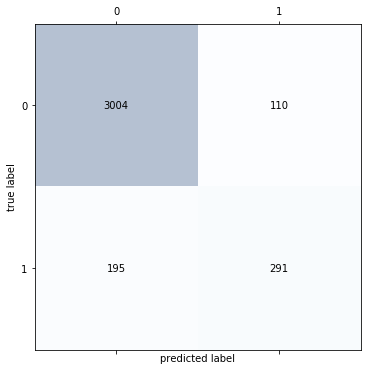

In [267]:
import lightgbm as lg

lgbm = lg.LGBMClassifier(seed=42)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

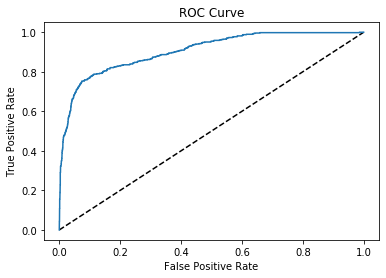

In [269]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lgbm.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [270]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lgbm.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9055543001075721


In [271]:
learning_rate = [0.5, 0.25, 0.1]
max_bin = [64, 200, 400]
num_leaves = [32, 64, 100]
max_depth = [11, 14, 17]
min_data_in_leaf = [40, 160, 320]

param_grid = {'learning_rate': learning_rate,        
               'max_bin' : max_bin,
               'max_depth': max_depth,
               'num_leaves': num_leaves,                         
               'min_data_in_leaf': min_data_in_leaf
               }

In [272]:
lgbm = lg.LGBMClassifier(seed=42)
lgbm_final = GridSearchCV(estimator = lgbm, param_grid = param_grid, cv = 5, n_jobs = -1)

lgbm_final.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, seed=42, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.25, 0.1],
                 

In [273]:
lgbm_final.best_params_, lgbm_final.best_score_

({'learning_rate': 0.1,
  'max_bin': 200,
  'max_depth': 11,
  'min_data_in_leaf': 320,
  'num_leaves': 32},
 0.9221428571428572)

Accuracy: 0.9167
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      3114
        True       0.72      0.62      0.67       486

    accuracy                           0.92      3600
   macro avg       0.83      0.79      0.81      3600
weighted avg       0.91      0.92      0.91      3600



Text(0, 0.5, 'true label')

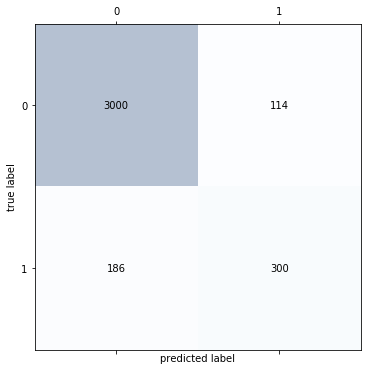

In [274]:
lgbm = lg.LGBMClassifier(learning_rate = 0.1, max_bin = 200, max_depth = 11, min_data_in_leaf = 320, num_leaves = 32, seed=42)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

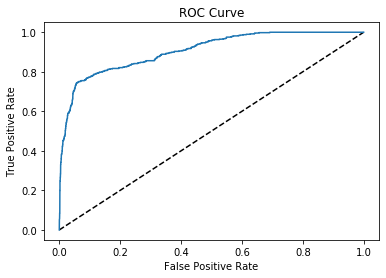

In [275]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lgbm.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [276]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lgbm.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9063201233774987


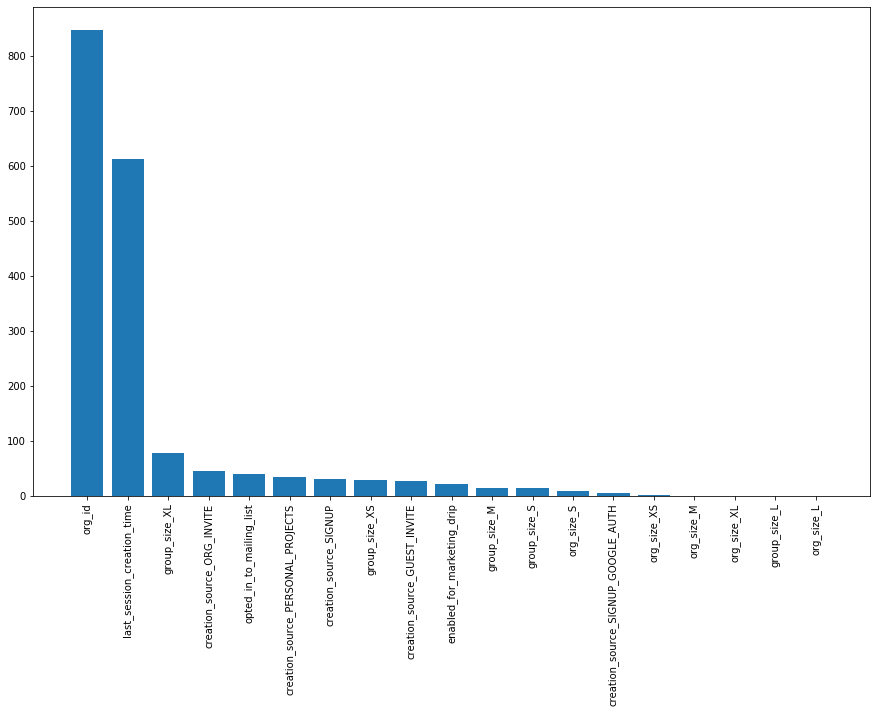

In [278]:
# calculate feature importances
importances = lgbm.feature_importances_

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize = (15, 9))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation = 90)
plt.show()